In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
from pylab import savefig

### Load data from project_function

In [2]:
import sys, os

data = ['CA','GB','US']

sys.path.insert(0, os.path.abspath('../submitted'))
from scripts import project_functions # This is called a relative import
df_lastdate = project_functions.load_and_process(data)

In [72]:
df_lastdate.to_csv('df_lastdate.csv', index=False)

# Exploratory Data Analysis (EDA) 

*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

### Pandas_profiling

In [123]:
#profiling = pandas_profiling.ProfileReport(df_clean)

### Data Analysis and Visualizations

In [26]:
sns.set_theme(style="white",
              font_scale=1,
             )

#### Added Log

In [28]:
from scripts import project_functions # This is called a relative import
df_log = project_functions.log(df_lastdate)

#### Question 1:  What categories of videos are people interested to watch?

There are many different types of video that published on Youtube. If one would like to start a new channel, it is very important to know the recent trend of video on Youtube including but not limit to the number of video published in each categories, what categories of video people are enjoy to watch etc.

In [10]:
#Group category
category_group = (
    df_lastdate.groupby(by='category')
    .size()
    .sort_values(ascending = False)
    .reset_index()
    .rename(columns= {0:'number_of_video'})
)
category_group

,category,#_count
0,Sports,1189
1,Entertainment,1095
2,Music,967
3,People & Blogs,390
4,Gaming,340
5,Comedy,323
6,Science & Technology,239
7,News & Politics,237
8,Howto & Style,207
9,Film & Animation,134


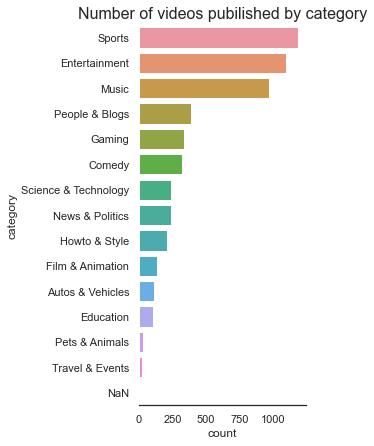

In [16]:
sns.countplot(data = df_lastdate, y='category',order=category_group['category'])
plt.gcf().set_size_inches(3,7)
sns.despine(right = True, left = True)
plt.title('Number of videos pubilished by category', fontsize=16)
plt.savefig('number_video.png')

*Statistics show that the 'sport','entertainment' and 'music' are the three commons types of videos that being published on Youtube.*

In [129]:
df_assign = df_lastdate.assign(log_viewcount= np.log(df_lastdate['view_count']))

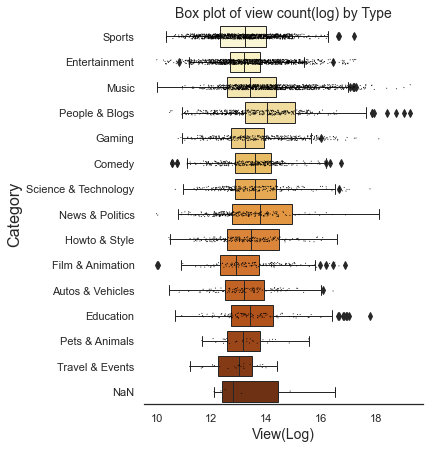

In [23]:
sns.boxplot(data = df_assign, x='log_views', y='category', 
            palette = 'YlOrBr', linewidth =1)
sns.stripplot(data = df_assign, x='log_views', y='category',
              color ='black',size = 1, order = category_group['category'])
sns.despine(right = True, left = True)
plt.gcf().set_size_inches(5,7)
plt.title('Box plot of view count(log) by Type', fontsize=14)
plt.xlabel('View(Log)', 
          fontsize = 14)
plt.ylabel('Category',fontsize = 16)
plt.show()

The box plot shows that videos in 'People & Blogs','news & politics' and 'Science & Technology' categories capture more views than others, indicating that individuals are more interested in watching blog and science videos on Youtube. The videos in ‘Travel & Animals’ and ‘Film & Animation’ attract less interest.

**In conclusion, most videos on Youtube were published in the categories of 'sport', 'entertainment' and 'music'. However, according to the findings, individuals are more willing to spend time watching 'People & Blogs' 'news & politics' and 'Science & Technology' videos. If people want to post videos on Youtube and attract more views, they should consider to post on 'People & Blogs' and 'Science & Technology' rather than 'sport', 'entertainment' and 'music'**

####  Question 2: Are there any differences between the three countries?

People from different countries might have different areas of interest, and they might vary from each other. As a result, it is also significant to explore what categories of video individuals are interested in watching in each country.

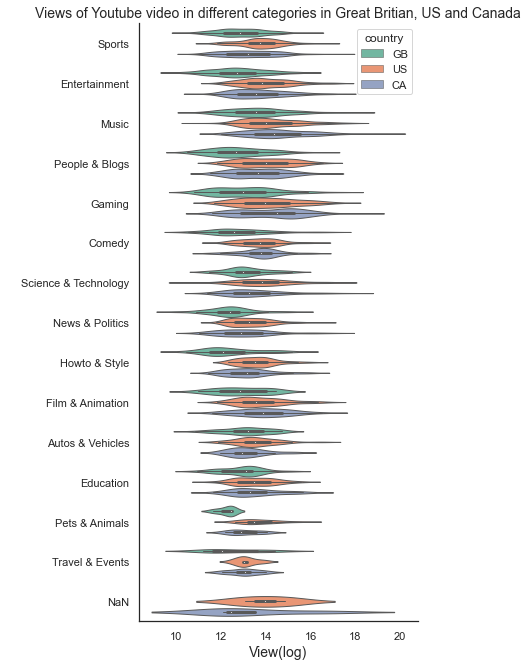

In [22]:
sns.violinplot(data = df_assign, x='log_views', y='category',
              order = category_group['category'], hue = 'country',
              palette = 'Set2',
              linewidth = 1)
sns.despine(right = True)
plt.gcf().set_size_inches(5,11)
plt.title('Views of Youtube video in different categories in Great Britian, US and Canada', fontsize=14)
plt.xlabel('View(log)', 
          fontsize = 14)
plt.ylabel(' ')
plt.show()

*Looking into the popularity of video categories in terms of different countries, the violin plot shows that among these three countries, Canadians show the most interest in watching music, gaming, and science videos. Pets & animals videos attract the least views in Great Britain and are more popular in the US. Individuals in Great Britain are more interested in watching music, blog, and gaming videos.*

####  Question 3: What are the changes in the genre of videos people are watching over time?

People from different countries might have different areas of interest, and they might vary from each other. As a result, it is also significant to explore what categories of video individuals are interested in watching in each country.

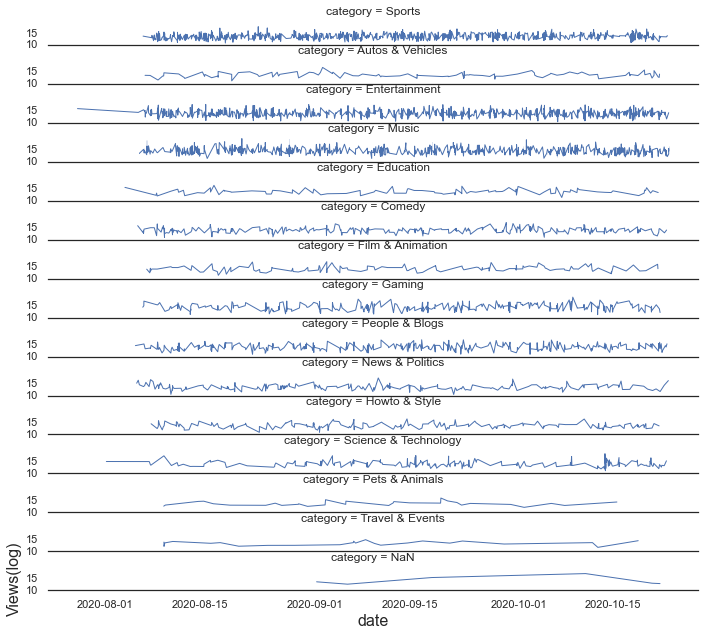

In [63]:
g = sns.relplot(data = df_assign, x ='publishedAt', y = 'log_views', col ='category',col_wrap=1,height=5, aspect=.75, linewidth = 1,kind="line").set_ylabels(' ')
plt.gcf().set_size_inches(11,8)
sns.despine(right = True, left = True)
plt.xlabel('date',fontsize=16)
plt.ylabel('Views(log)',fontsize =16)
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.savefig('time.png')

With regard to the plot of Change over Time of Views in each Category, it can be seen that in categories with more videos there is typically more viewership because users tend to generally keep up with those uploads. 


#### Things inside the project_function

In [4]:
# load all the dataset into a single dataframe df

country = ['CA','GB','US']

df = pd.DataFrame()
df1 = pd.DataFrame()

for c in country:
    df1 = pd.read_csv('../../data/raw/'+ c +'_youtube_trending_data.csv',parse_dates= ['trending_date','publishedAt'])
    df1['country']= c
    df = pd.concat([df,df1])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).drop(df_clean[df_clean['view_count']==0].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])

 #turn tags into actual list
df_clean["tags"] = df_clean.apply(lambda row: row["tags"].split("|"), axis=1)
    
#calculate the videos' like to dislike ratio (assuming that there are likes and dislikes)
df_clean["ratio"] = df_clean.apply(lambda row: 0 if row["dislikes"]==0 else (row["likes"]/row["dislikes"]), axis=1)

#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')
df_lastdate = df_lastdate.drop(df_lastdate[df_lastdate['view_count']== 0 ].index)